# Lab/Assignment 2: Helmholtz coils

A figure of Helmholtz coils is shown below-- basically two coils of radius R separated by a distance that is equal to R.  This configuration was shown to have a particularly uniform field volume in the center- basically the first and second derivatives of the field vanished in the central volume.  






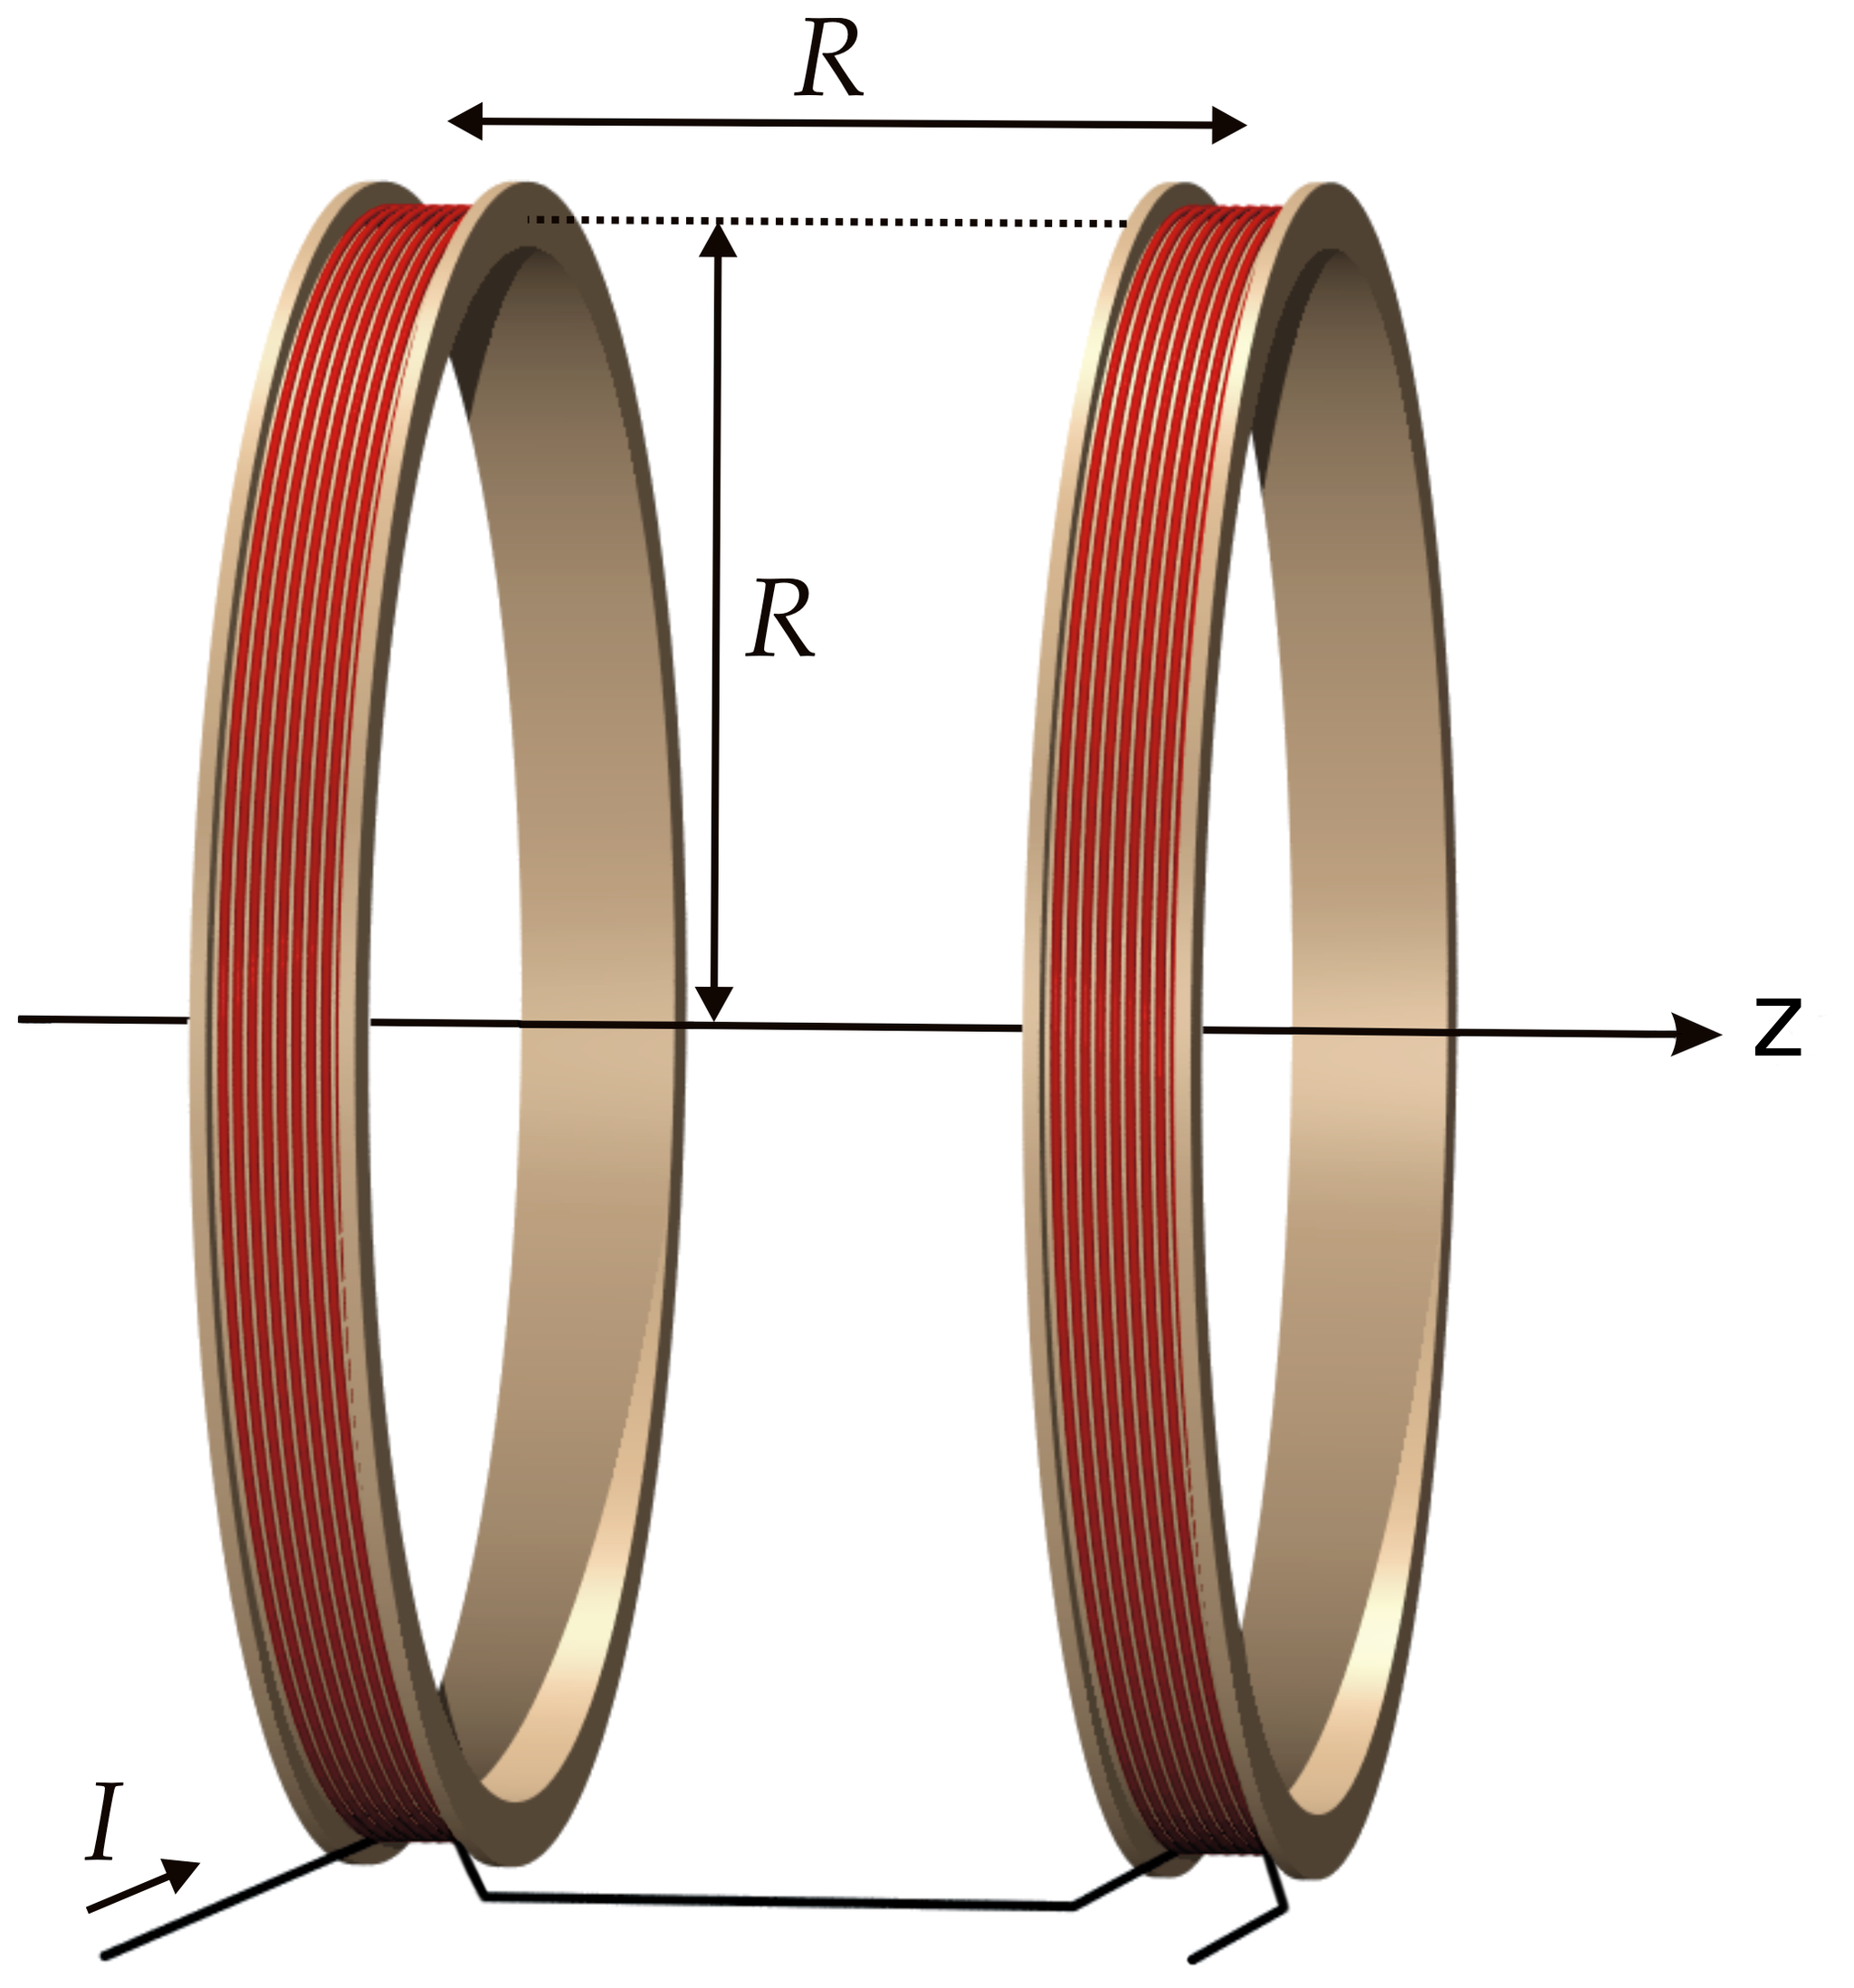
(Ansgar Hellwig, CC BY-SA 2.0 DE <https://creativecommons.org/licenses/by-sa/2.0/de/deed.en>, via Wikimedia Commons)

 Calculate the magnetic field, ignoring the geometry of the wires.  Assume that R=20 cm, and that each coil has 100 turns, and carries a current of 0.5 ampere, and are arranged in 10 layers of 10 turns, and the centers of the coil are at $z=\pm10\rm{~cm}.$  The wires have a diameter of 1 mm, so the cross section of the coil is 1 cm x 1 cm. (For the first calculation, the coils extend from $\rho=20$ to $\rho=21$ cm.  This is a little off, the ideal, but we fix it in part 2 of the problem.) 



Plot the x and z components of the field along the z and x axes, zooming in on the region in the center of the coils where the field is flat.  

Note:  you will probably run into trouble with computer speeds plotting the x component along the z axis.  This is because, by symmetry it is zero, and the numerical algorithms try to impose a relative precision, and do many calculations to get the field to cancel.  Calculate one or two values at exactly z=0, to see how long it takes.
Then do the calculation along the line z=0.0001 m ( a tiny offset from the z-axis).

$\vec B(\vec r)=\frac{\mu_0}{4\pi}\int\ dV\ \frac{\vec J\times(\vec r-\vec r')}{|\vec r-\vec r'|^3}\ \text{(Biot-Savart law)} \\$
$\vec r'=(R\cos\phi+x_0',R\sin\phi,z'),\ \text{where}\ x_0'\ \text{is some offset from the}\ x-\text{axis} \\$
$\vec r=(x,y,z) \\$
$\vec r-\vec r'=(x-r\cos\phi-x_0', y-r\sin\phi,z-z') \\$
$\vec J=J(\sin\phi,-\cos\phi,0) \\$
$dV=r\ dr\ d\phi\ dz' \\$

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from scipy.constants import mu_0

def plot(f, xmin, xmax, ylabel="y", xlabel="x", title=None):
    
    xs = np.linspace(xmin, xmax, 50, endpoint=True)
    ys = [f(x) for x in xs]

    plt.plot(xs, ys)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xmin, xmax)
    
    if title:

        plt.title(title)

    plt.show()

R = 20e-2                       # radius of Helmholtz coil
d = 1e-3                        # diameter of wire
a = 1e-2                        # width of volume current
I = 0.5                         # current through each wire loop
abs_J = 100 * I / (1e-2) ** 2   # magnitude of volume current density

def get_coil_field(x, y, z, x_0prime, center):

    def integrand(zprime, phi, r, i):

        delta_r      = np.array([x - r * np.cos(phi) - x_0prime, y - r * np.sin(phi), z - zprime])
        norm_delta_r = np.linalg.norm(delta_r)
        J            = abs_J * np.array([np.sin(phi), -np.cos(phi), 0])

        return mu_0 / (4 * np.pi) * (np.cross(J, delta_r) / norm_delta_r ** 3)[i] * r

    return np.array([
        scipy.integrate.tplquad(lambda zprime, phi, r: integrand(zprime, phi, r, 0), ## integrate first component
                                R, R + a,
                                0, 2 * np.pi,
                                center - a / 2, center + a / 2)[0],
        scipy.integrate.tplquad(lambda zprime, phi, r: integrand(zprime, phi, r, 1), ## second
                                R, R + a,
                                0, 2 * np.pi,
                                center - a / 2, center + a / 2)[0],
        scipy.integrate.tplquad(lambda zprime, phi, r: integrand(zprime, phi, r, 2), ## third
                                R, R + a,
                                0, 2 * np.pi,
                                center - a / 2, center + a / 2)[0]
    ])

def get_total_field(x, y, z, spacing = 0, x_0prime1 = 0, x_0prime2 = 0):

    B_1 = get_coil_field(x, y, z, x_0prime1, - R / 2 - a / 2 - spacing / 2)
    B_2 = get_coil_field(x, y, z, x_0prime2, R / 2 + a / 2 + spacing / 2)

    return B_1 + B_2

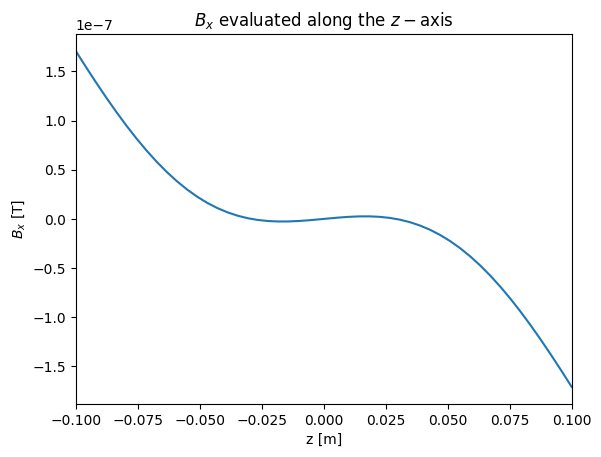

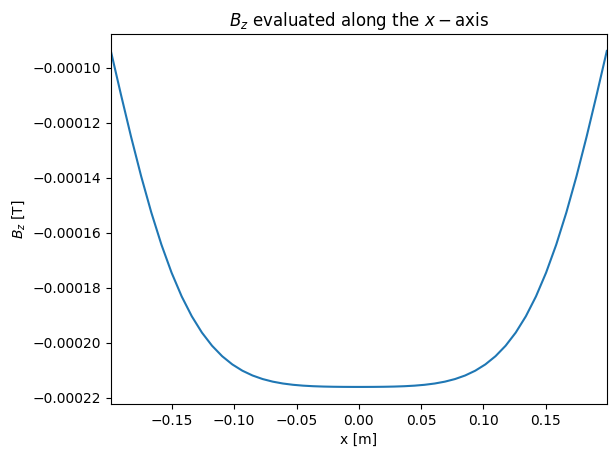

In [7]:
# use the z range [-R/2, R/2] to zoom in on the center of the coils
plot(lambda z: get_total_field(0.001, 0, z)[0], - R / 2, R / 2, "$B_x$ [T]", "z [m]", title="$B_x$ evaluated along the $z-$axis")
# use the x range [0, R] at z = R / 2 for the center of the coils
# subtract 0.001 because integration takes forever if I go right to the edge
plot(lambda x: get_total_field(x, 0, 0)[2], -R + 0.001, R - 0.001, "$B_z$ [T]", "x [m]", title="$B_z$ evaluated along the $x-$axis")

2. Replot the z components of the field if we change the spacing between the coils by 0.5 cm?  1 cm?

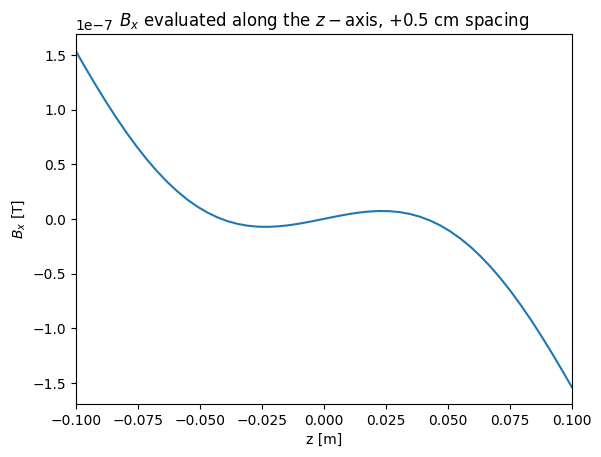

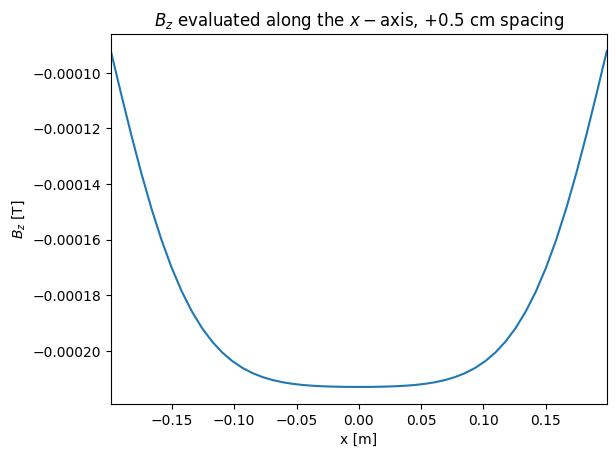

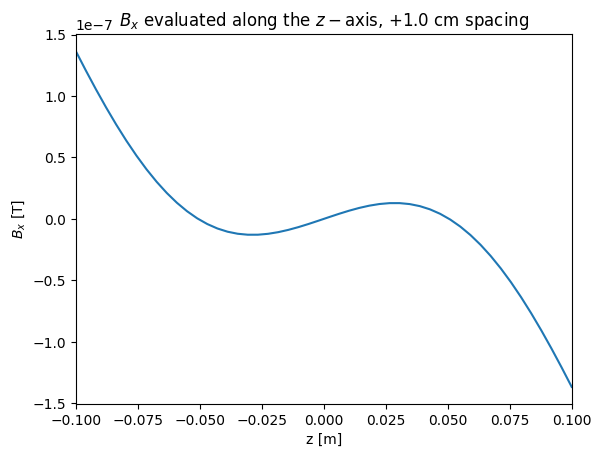

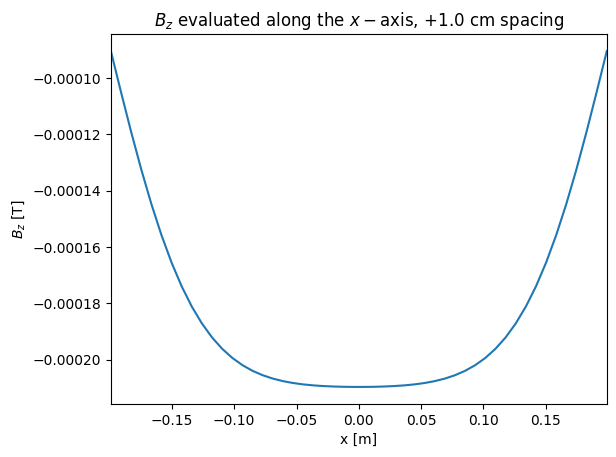

In [8]:
plot(lambda z: get_total_field(0.001, 0, z, spacing=0.5e-2)[0], - R / 2, R / 2,     "$B_x$ [T]", "z [m]", title="$B_x$ evaluated along the $z-$axis, +0.5 cm spacing")
plot(lambda x: get_total_field(x, 0, 0, spacing=0.5e-2)[2], - R + 0.001, R - 0.001, "$B_z$ [T]", "x [m]", title="$B_z$ evaluated along the $x-$axis, +0.5 cm spacing")

plot(lambda z: get_total_field(0.001, 0, z, spacing=1e-2)[0], - R / 2, R / 2,     "$B_x$ [T]", "z [m]", title="$B_x$ evaluated along the $z-$axis, +1.0 cm spacing")
plot(lambda x: get_total_field(x, 0, 0, spacing=1e-2)[2], - R + 0.001, R - 0.001, "$B_z$ [T]", "x [m]", title="$B_z$ evaluated along the $x-$axis, +1.0 cm spacing")

3.  Replot the z component of the field if the center of the rightmost coil is moved from x=0, z=10 cm to x=2, z=10 cm?

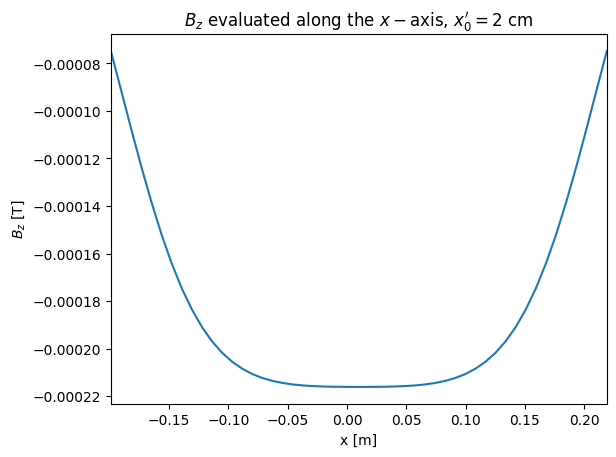

In [10]:
plot(lambda x: get_total_field(x, 0, 0, x_0prime2=2e-2)[2], - R + 0.001, R - 0.001 + 0.02, "$B_z$ [T]", "x [m]", title="$B_z$ evaluated along the $x-$axis, $x_0'=2$ cm")